In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = 'train/train.csv'

data_df = pd.read_csv(data_path)

In [4]:
# check for null titles
data_df['title'].isnull().sum()

558

In [5]:
# remove null rows
data_df = data_df.dropna(axis=0, subset=['title'])
data_df = data_df.reset_index(drop=True)

display(data_df)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20237,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20238,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20239,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20240,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [6]:
data_df['title'].isnull().sum()

0

In [7]:
true_df = data_df[data_df['label'] == 1]
fake_df = data_df[data_df['label'] == 0]

In [13]:
true_df.columns.values[4] = 'true'
fake_df.columns.values[4] = 'true'

# concat
df = pd.concat([true_df, fake_df])
display(df)

,id,title,author,text,true
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
...,...,...,...,...,...
20234,20792,"Jakarta Bombing Kills Three Police Officers, L...",John Hayward,Two suicide bombers attacked a bus station in ...,0
20236,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0
20237,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20238,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0


In [14]:
# inspect length of news
titles = [text for text in df.title]

max_len = 0
titles_len = []
for title in titles:
    titles_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)
    
print('Number of titles:', len(titles))
print('Max length of the titles:', max_len)
print('Mean length of the titles:', np.mean(titles_len))

Number of titles: 20242
Max length of the titles: 72
Mean length of the titles: 12.420709416065606


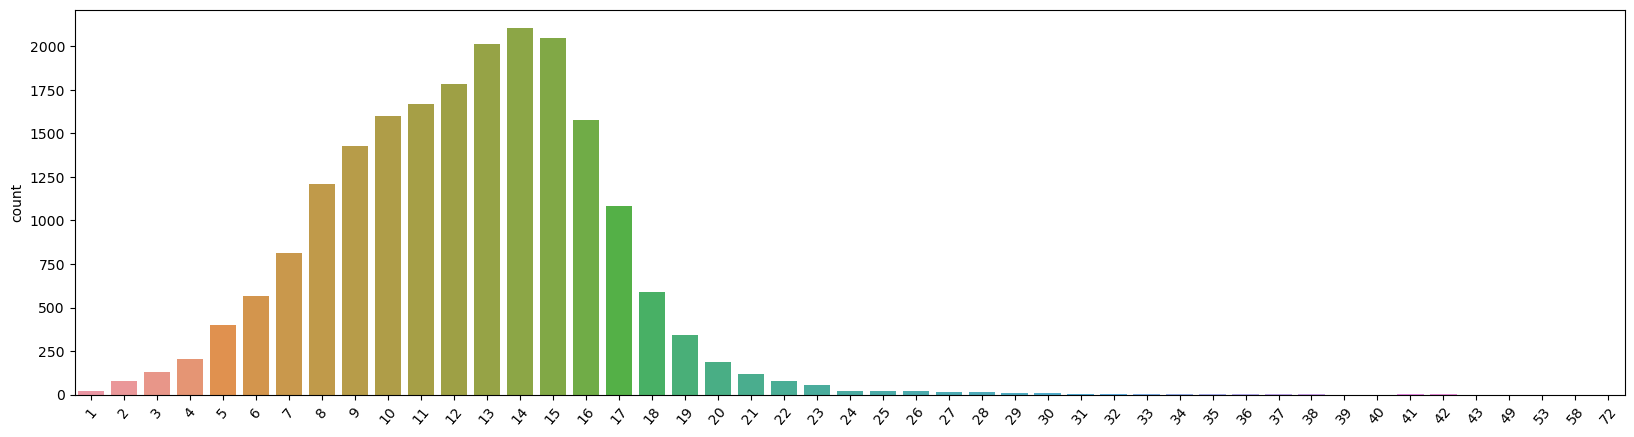

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
g = sns.countplot(x=titles_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
plt.show()

In [16]:
# purify and shuffle the DataFrame
from sklearn.utils import shuffle

# purify
df = df.iloc[:, [1, -1]]

# shuffle
df = shuffle(df).reset_index(drop=True)

display(df)

,title,true
0,Angry Voters Trying to Flee Country Over Presi...,1
1,The Twists and Turns of ‘La Marseillaise’ - Th...,0
2,UN Signs Up Syrian Olympic Swimmer to Shine Li...,0
3,The High Cost of Investing Like a Daredevil -...,0
4,"On Crime Bill and the Clintons, Young Blacks C...",0
...,...,...
20237,Rise in Infant Drug Dependence Is Felt Most in...,0
20238,"Maya DiRado, Exiting the Sport, Catches Katink...",0
20239,Sleepy Behind the Wheel? Some Cars Can Tell - ...,0
20240,Illegal Immigrant Advocates Pledge to Resist D...,1


In [17]:
# DataFrame to csv
train_df = df.sample(frac=0.8)
val_df = df.drop(train_df.index)

# reset index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print('trainset size:', train_df.shape)
print('valset size:', val_df.shape)

train_df.to_csv('train.tsv', sep='\t', index=False)
val_df.to_csv('val.tsv', sep='\t', index=False)

trainset size: (16194, 2)
valset size: (4048, 2)
